# heart_failure-clinical-data
### 12 clinical features for predicting death events.
- URL
  - https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
- Description
>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure. <br> Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies. <br> People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
- Variable
  - count : 299
  - 예측변수 (Target)
    - DEATH_EVENT (사망)
      - If the patient died during the follow-up period
      - Boolean
  - 설명변수
    - Age (나이)
      - Age of the patient
      - Years
    - Anaemia (빈혈)
      - Decrease of red blood cells or hemoglobin
      - Boolean
    - High blood pressure (고혈압)
      - If a patient has hypertension
      - Boolean
    - Creatinine phosphokinase (CPK) (혈액 내 크레아틴 활성화 효소)
      - Level of CPK enzyme in the blood
      - mcg/L
      - dtype : int
    - Diabetes (당뇨)
      - If the patient has diabetes
      - Boolean
    - Ejection fraction (심장에서 내보낼 수 있는 혈액의 양)
      - Percentage of blood leaving
      - percentage
      - dtype = int
    - Sex (성별)
      - woman or man
      - binary
      - female = 0, male = 1
    - Platelets (혈소판 수치)
      - Platelets in the blood
      - kilo platelets/mL
      - float
    - Serum creatinine (혈액 내 크레아티닌(Cr) 수치)
      - Level of creatinine in the blood
      - mg/dL
      - dtype = float
    - Serum sodium (혈액 내 나트륨 수치)
      - Level of sodium in the blood
      - mEq/L
      - dype - int
    - smoking (흡연)
      - if the patient smokes
      - boolean
    - Time (치료 후 회복 기간)
      - Follow-up period
      - Days
  




## 데이터 불러오기

In [ ]:
# read csv

# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
# 구글 드라이브에서 파일 읽어오기
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
df.shape

Mounted at /content/gdrive


(299, 13)

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 데이터 탐색 (EDA)

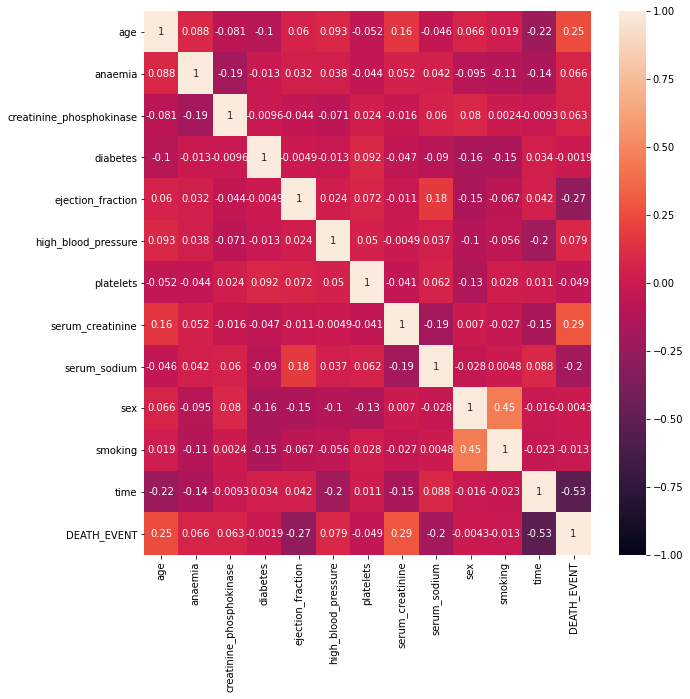

In [47]:
# DEATH_EVENT와 상관성이 높은 변수 체크
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

### 사망과 관련 없는 변수들
- 성별, 빈혈, 당뇨, 고혈압, 혈액 내 크레아틴 활성 효소, 혈소판 수치, 흡연

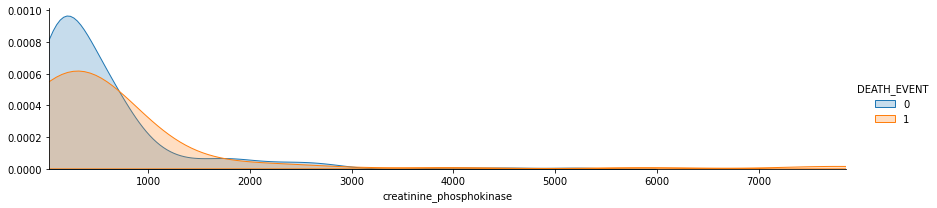

In [ ]:
# 크레아틴 활성 효소와 사망의 관계
cpk = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
cpk.map(sns.kdeplot, 'creatinine_phosphokinase', shade=True)
cpk.set(xlim=(df['creatinine_phosphokinase'].min(),df['creatinine_phosphokinase'].max()))
cpk.add_legend()

plt.show()


크레아틴활성효소와 사망의 관계는 없어 보입니다.

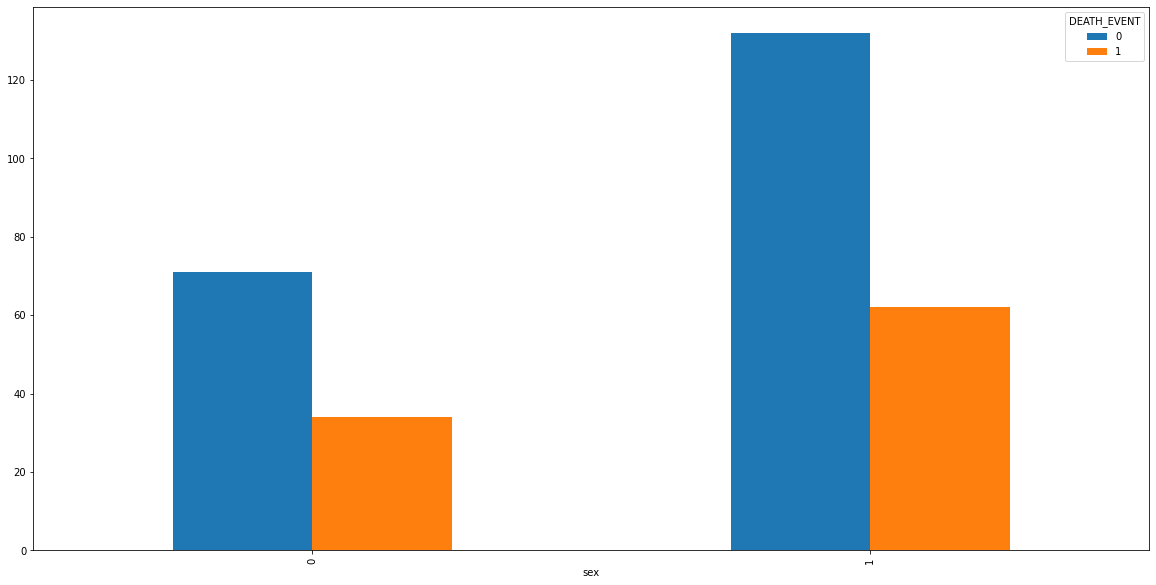

In [ ]:
# 성별과 사망의 관계
# woman = 0, man = 1
sex_df = df.groupby(['sex','DEATH_EVENT'])['DEATH_EVENT'].count().unstack('DEATH_EVENT')
sex_df.plot(kind='bar', figsize=(20,10))
plt.show()

성별과 사망의 관계는 없어 보입니다.

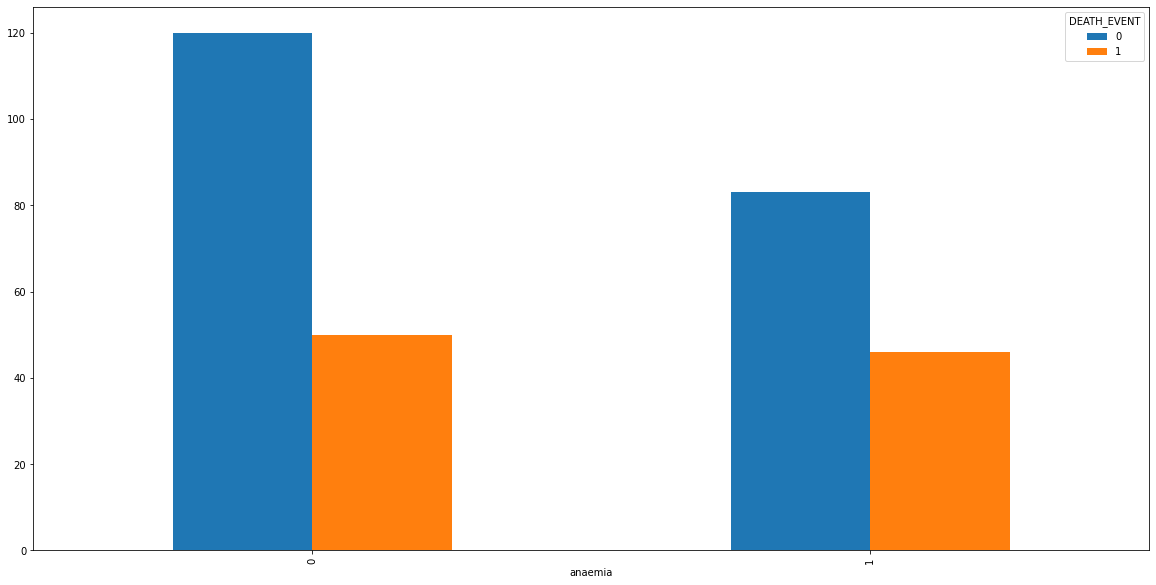

In [ ]:
# 빈혈과 사망의 관계
anaemia_df = df.groupby(['anaemia','DEATH_EVENT'])['DEATH_EVENT'].count().unstack('DEATH_EVENT')
anaemia_df.plot(kind='bar', figsize=(20,10))
plt.show()

빈혈이 있는 경우가 사망비율이 조금 높아 보입니다

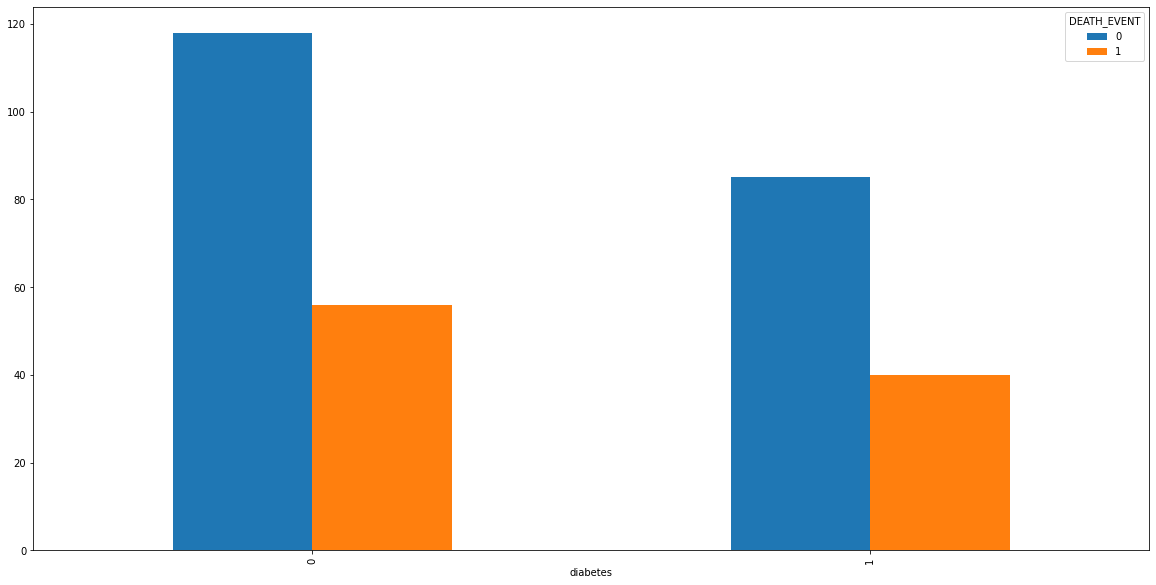

In [ ]:
# 당뇨와 사망의 관계
diabetes_df = df.groupby(['diabetes','DEATH_EVENT'])['DEATH_EVENT'].count().unstack('DEATH_EVENT')
diabetes_df.plot(kind='bar', figsize=(20,10))
plt.show()

당뇨와 사망의 관계도 없어 보입니다

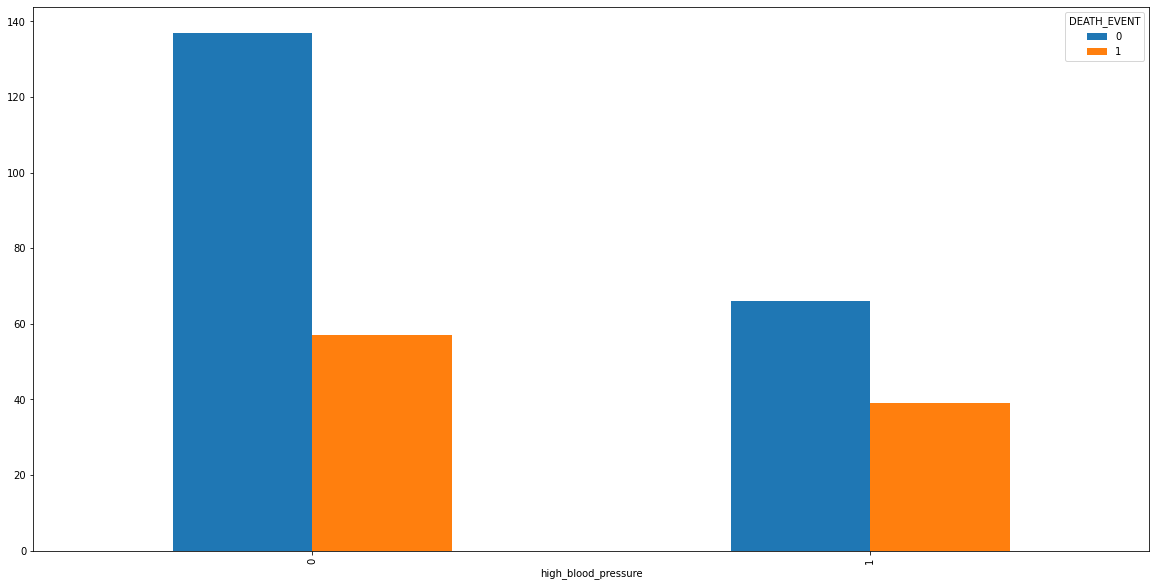

In [ ]:
# 고혈압과 사망의 관계
high_presure_df = df.groupby(['high_blood_pressure','DEATH_EVENT'])['DEATH_EVENT'].count().unstack('DEATH_EVENT')
high_presure_df.plot(kind='bar', figsize=(20,10))
plt.show()

고혈압의 경우 사망과 관계가 있어 보이지만 상관관계를 확인해봐야겠습니다

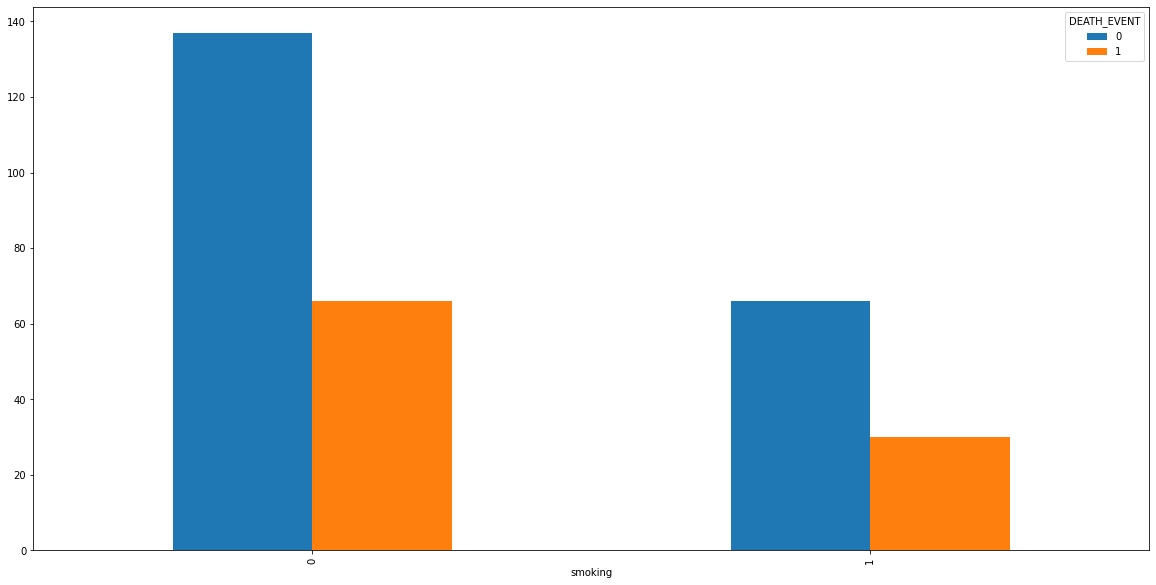

In [ ]:
# 흡연과 사망의 관계
smoking_df = df.groupby(['smoking','DEATH_EVENT'])['DEATH_EVENT'].count().unstack('DEATH_EVENT')
smoking_df.plot(kind='bar', figsize=(20,10))
plt.show()

흡연의 경우 사망과 관계가 없어 보입니다

### 사망과 관련있는 변수
- 나이, 심장에서 나오는 혈액의 비율, 혈액 내 크레아틴 수치, 혈액 내 나트륨 수치, 회복기간

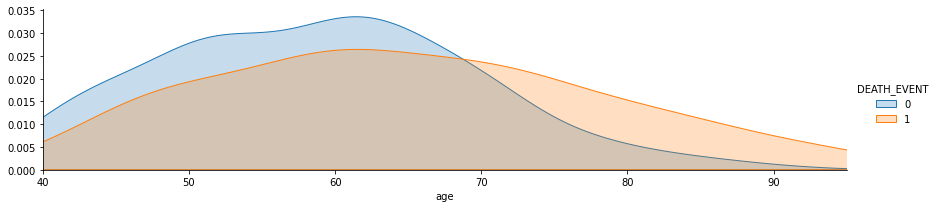

In [48]:
# 연령별 사망자 수
facet = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(df['age'].min(),df['age'].max()))
facet.add_legend()

plt.show()

젊을수록 생존자가 많고 고령자는 사망의 비율이 높습니다. 사망자 중에선 60대에서 70대의 연령이 가장 많습니다.

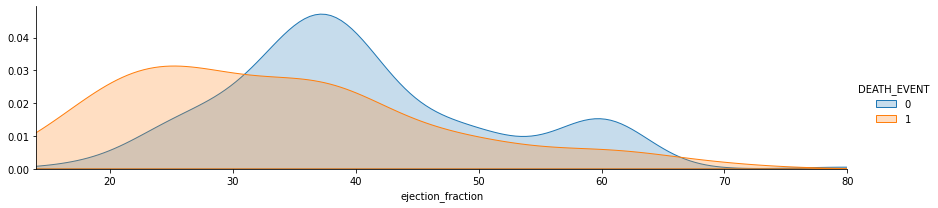

In [ ]:
# ejection_fraction과 사망의 관계
eject = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
eject.map(sns.kdeplot, 'ejection_fraction', shade=True)
eject.set(xlim=(df['ejection_fraction'].min(),df['ejection_fraction'].max()))
eject.add_legend()

plt.show()

ejection_fraction은 번역하면 심신 이완 말기의 심실 혈액량에 대한 1회 방출비를 말하며 단순하게 심실에서 나오는 혈액의 비율입니다. 정상범위는 50%에서 60%입니다.
위의 그래프를 보면 확실히 사망자의 방출비가 낮은 것을 볼 수 있습니다.

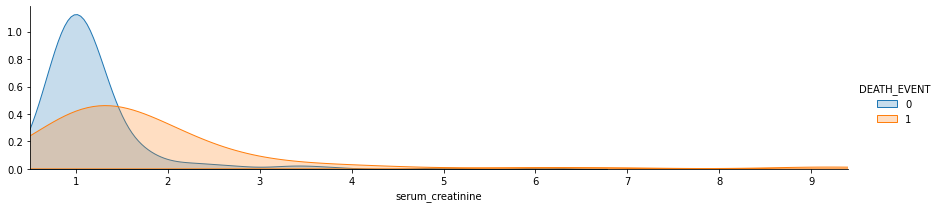

In [ ]:
# 혈액 내 크레아티닌 수치와 사망의 관계
scpk = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
scpk.map(sns.kdeplot, 'serum_creatinine', shade=True)
scpk.set(xlim=(df['serum_creatinine'].min(),df['serum_creatinine'].max()))
scpk.add_legend()

plt.show()

크레아티닌 수치의 경우 사망자가 생존자보다 높은 수치를 보이고 있습니다.

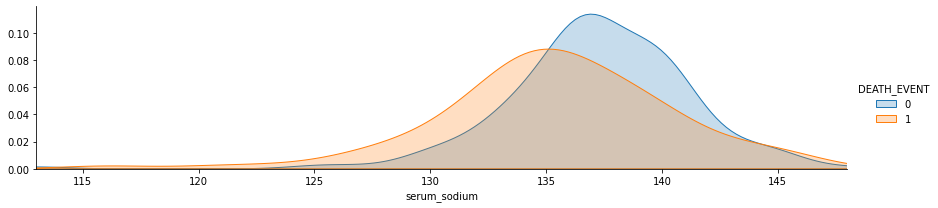

In [ ]:
# 혈액 내 나트륨 수치와 사망의 관계
sna = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
sna.map(sns.kdeplot, 'serum_sodium', shade=True)
sna.set(xlim=(df['serum_sodium'].min(),df['serum_sodium'].max()))
sna.add_legend()

plt.show()

혈액 내 나트륨 수치의 정상범위는 135 ~ 145 mEq/L입니다. 사망자가 생존자보다 낮은 수치를 가지고 있습니다

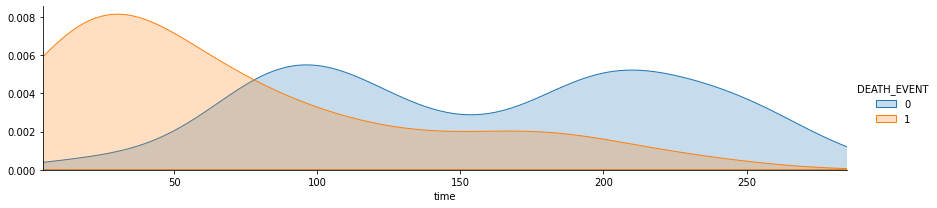

In [ ]:
# 시간과 사망의 관계
ft = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
ft.map(sns.kdeplot, 'time', shade=True)
ft.set(xlim=(df['time'].min(),df['time'].max()))
ft.add_legend()
plt.show()

치료 후 지나는 시간이 길어질 수록 생존 확률이 높아집니다

## 데이터 전처리

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# 데이터 타입 확인
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
# missing data check
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### 1. 기존 데이터 그대로 이용

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']],df[['DEATH_EVENT']], test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(239, 12) (239, 1)
(60, 12) (60, 1)


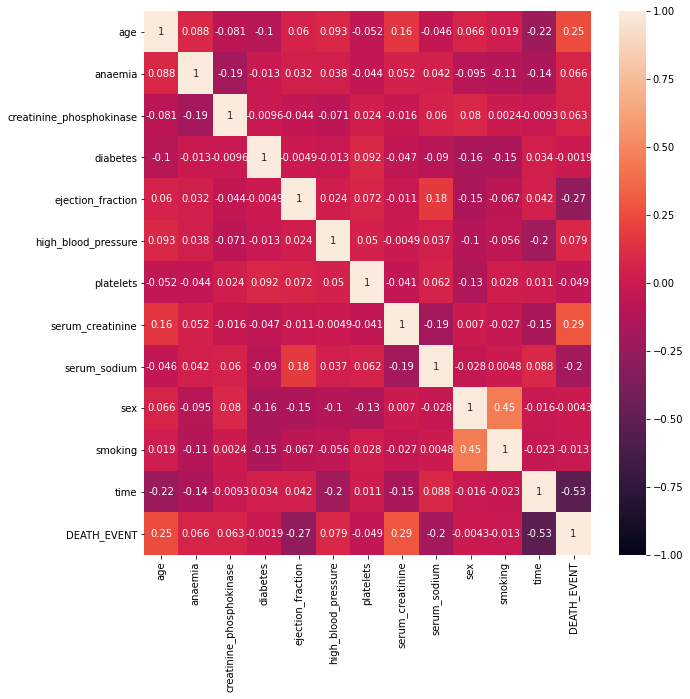

### 2. DEATH_EVENT와 상관성이 있는 변수들의 목록 체크

In [ ]:
# heatmap결과 절댓값 0.2 이상의 변수만 따로 가져와서 새로운 dataset을 구성
# age, ejection_fraction, serum_creatinine, serum_sodium, time
x_corr_train, x_corr_test, y_corr_train, y_corr_test = train_test_split(df[['age','ejection_fraction','serum_creatinine','serum_sodium','time']],df[['DEATH_EVENT']],test_size=0.2,random_state=0)
print(x_corr_train.shape, y_corr_train.shape)
print(x_corr_test.shape, y_corr_test.shape)

(239, 5) (239, 1)
(60, 5) (60, 1)


### 3. Data Scaling


데이터 특성별로 스케일이 다르다면 학습에 영향이 원하지 않는 방향이 될 수 있다.
따라서, 데이터 스케일링 작업을 통해 모든 특성의 범위(또는 분포)를 같게 만들어줘야 한다
<br>4가지 스케일링이 있다
1. StandardScaler
  - 각 특성의 평균을 0, 분산을 1로 스케일링
  - 데이터를 정규분포로 마든다.
  - 회귀보다 분류에 유용
2. RobustScaler
  - 각 특성의 중앙값을 0, IQR을 1로 스케일링
  - StandardScaler와 비슷하지만 이상치의 영향을 최소화
3. MinMaxScaler(a, b)
  - 각 특성의 min=a, max=b로 스케일링
  - 분류보다 회귀에 유용
4. Normalizer
  - 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링
  - 모델(특히 딥러닝) 내 학습 벡터에 적용하며, feature들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않는다.

- _주의_
<br>학습용 데이터에는 fit(), transform()을 사용하지만 테스트 데이터에 fit()을 사용해서는 안된다. 테스트 데이터와 학습 데이터의 다른 기준의 스케일링이 되어버리기 때문이다.
  1. 전체 데이터의 스케일링 변환 후 학습데이터와 테스트 데이터로 분리
  2. 1이 불가능 한 경우 테스트 데이터는 fit된 스케일러 객체를 이용하여 transform() 수행

#### StandardScaler와 MinMaxScaler를 사용

In [ ]:
# StandardScaler 사용
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
XS = sscaler.fit_transform(df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']])
x_train_standard_scale, x_test_standard_scale, y_train_standard_scale, y_test_standard_scale = train_test_split(XS,df[['DEATH_EVENT']],test_size=0.2, random_state=0)

In [ ]:
# MinMaxScaler 사용
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
XM = mscaler.fit_transform(df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']])
x_train_minmax_scale, x_test_minmax_scale, y_train_minmax_scale, y_test_minmax_scale = train_test_split(XM,df[['DEATH_EVENT']],test_size=0.2, random_state=0)

In [ ]:
print(x_train_standard_scale.shape, y_train_standard_scale.shape)
print(x_test_standard_scale.shape, y_test_standard_scale.shape)
print(x_train_minmax_scale.shape, y_train_minmax_scale.shape)
print(x_test_minmax_scale.shape, y_test_minmax_scale.shape)

(239, 12) (239, 1)
(60, 12) (60, 1)
(239, 12) (239, 1)
(60, 12) (60, 1)


### 4. 상관성이 있는 변수들을 Scaling

In [ ]:
# 상관이 큰 변수들을 가지고 scaler 적용
x_df_corr = df[['age','ejection_fraction','serum_creatinine','serum_sodium','time']]
y_df_corr = df[['DEATH_EVENT']]

# StandardScaler
Scaler = StandardScaler()
XS_corr = sscaler.fit_transform(x_df_corr)
x_corr_train_standard_scale, x_corr_test_standard_scale, y_corr_train_standard_scale, y_corr_test_standard_scale = train_test_split(XS_corr, y_df_corr, test_size=0.2, random_state=0)

# MinMaxScaler
Mscaler = MinMaxScaler()
XM_corr = Mscaler.fit_transform(x_df_corr)
x_corr_train_minmax_scale, x_corr_test_minmax_scale, y_corr_train_minmax_scale, y_corr_test_minmax_scale = train_test_split(XM_corr, y_df_corr, test_size=0.2, random_state=0)

print(x_corr_train_standard_scale.shape, y_corr_train_standard_scale.shape)
print(x_corr_test_standard_scale.shape, y_corr_test_standard_scale.shape)
print(x_corr_train_minmax_scale.shape, y_corr_train_minmax_scale.shape)
print(x_corr_test_minmax_scale.shape, y_corr_test_minmax_scale.shape)

(239, 5) (239, 1)
(60, 5) (60, 1)
(239, 5) (239, 1)
(60, 5) (60, 1)


### 데이터셋 정리
- x
  - 12개의 변수 : 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'
  - 5개의 변수 : 'age', 'ejection_fraction', 'serum_creatinine' ,'serum_sodium', 'time'
- y
  - 1개의 변수 : DEATH_EVENT

1. 기존 데이터 그대로 사용
  - x_train, y_train
  - x_test, y_test
2. 상관성이 높은 변수들을 사용
  - x_corr_train, y_corr_train
  - x_corr_test, y_corr_test
3. 기존 데이터의 스케일링 적용
  - StandardScaler
    - x_train_standard_scale, y_train_standard_scale
    - x_test_standard_scale, y_test_standard_scale
  - MinMaxScaler
    - x_train_minmax_scale, y_train_minmax_scale
    - x_test_minmax_scale, y_test_minmax_scale
4. 상관성이 높은 변수들에 스케일링 적용
  - StandardScaler
    - x_corr_train_standard_scale, y_corr_train_standard_scale
    - x_corr_test_standard_scale, y_corr_test_standard_scale
  - MinMaxScaler
    - x_corr_train_minmax_scale, y_corr_train_minmax_scale
    - x_corr_test_minmax_scale, y_corr_test_minmax_scale

# 학습모델
1. 의사결정트리 (Decision Tree)
2. 그래디언트 부스팅 분류 (Gradient Boosting Classifier)
3. 딥러닝 (Keras)

## 의사결정트리


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정트리 모델 생성하는 함수 정의 (parameter : max_depth, x_train, y_train)
# 불순도 지표는 entropy
def build_DT(maxDepth, X_data, Y_data):
  modelDT = DecisionTreeClassifier(criterion='entropy', max_depth=maxDepth, min_samples_leaf=5).fit(X_data, Y_data)
  return modelDT

In [ ]:
# 기존 데이터 이용
modelDT = build_DT(3,x_train,y_train)
# 상관도 높은 데이터 이용
modelDT_corr = build_DT(3, x_corr_train, y_corr_train)
# 기존 데이터의 스케일링 이용
modelDT_standard_scale = build_DT(2, x_train_standard_scale, y_train_standard_scale)
modelDT_minmax_scale = build_DT(2, x_train_minmax_scale, y_train_minmax_scale)
# 상관도 높은 데이터의 스케일링 이용
modelDT_corr_standard_scale = build_DT(3, x_corr_train_standard_scale, y_corr_train_standard_scale)
modelDT_corr_minmax_scale = build_DT(3, x_corr_train_minmax_scale, y_corr_train_minmax_scale)

In [ ]:
# 모든 의사결정트리의 정확도
from sklearn.metrics import classification_report

# 각종 평가 방법
# print(classification_report(y_test, modelDT.predict(x_test)))

# 기존 데이터 이용
print('기존 데이터 학습 정확도 : ', format(modelDT.score(x_train,y_train)))
print('기존 데이터 정확도 : ', format(modelDT.score(x_test, y_test)))
print('\n')
# 상관도 높은 데이터 이용
print('상관도 높은 데이터 학습 정확도 : ', format(modelDT_corr.score(x_corr_train, y_corr_train)))
print('상관도 높은 데이터 정확도 : ', format(modelDT_corr.score(x_corr_test, y_corr_test)))
print('\n')
# 기존 데이터의 스케일링 이용
print('기존 데이터 스케일링 학습 정확도 (StandardScaler) : ', format(modelDT_standard_scale.score(x_train_standard_scale, y_train_standard_scale)))
print('기존 데이터 스케일링 정확도 (StandardScaler) : ', format(modelDT_standard_scale.score(x_test_standard_scale, y_test_standard_scale)))
print('기존 데이터 스케일링 학습 정확도 (MinMaxScaler) : ', format(modelDT_minmax_scale.score(x_train_minmax_scale, y_train_minmax_scale)))
print('기존 데이터 스케일링 정확도 (MinMaxScaler) : ', format(modelDT_minmax_scale.score(x_test_minmax_scale, y_test_minmax_scale)))
print('\n')
# 상관도 높은 데이터의 스케일링 이용
print('상관도 높은 데이터 스케일링 학습 정확도 (StandardScaler) : ', format(modelDT_corr_standard_scale.score(x_corr_train_standard_scale, y_corr_train_standard_scale)))
print('상관도 높은 데이터 스케일링 정확도 (StandardScaler) : ', format(modelDT_corr_standard_scale.score(x_corr_test_standard_scale, y_corr_test_standard_scale)))
print('상관도 높은 데이터 스케일링 학습 정확도 (MinMaxScaler) : ', format(modelDT_corr_minmax_scale.score(x_corr_train_minmax_scale, y_corr_train_minmax_scale)))
print('상관도 높은 데이터 스케일링 정확도 (MinMaxScaler) : ', format(modelDT_corr_minmax_scale.score(x_corr_test_minmax_scale, y_corr_test_minmax_scale)))

기존 데이터 학습 정확도 :  0.8702928870292888
기존 데이터 정확도 :  0.85


상관도 높은 데이터 학습 정확도 :  0.8702928870292888
상관도 높은 데이터 정확도 :  0.85


기존 데이터 스케일링 학습 정확도 (StandardScaler) :  0.8702928870292888
기존 데이터 스케일링 정확도 (StandardScaler) :  0.85
기존 데이터 스케일링 학습 정확도 (MinMaxScaler) :  0.8702928870292888
기존 데이터 스케일링 정확도 (MinMaxScaler) :  0.85


상관도 높은 데이터 스케일링 학습 정확도 (StandardScaler) :  0.8702928870292888
상관도 높은 데이터 스케일링 정확도 (StandardScaler) :  0.85
상관도 높은 데이터 스케일링 학습 정확도 (MinMaxScaler) :  0.8702928870292888
상관도 높은 데이터 스케일링 정확도 (MinMaxScaler) :  0.85


### 의사결정트리 결과
모든 데이터로 학습한 결과 학습 정확도는 87%, 테스트 정확도 85%로 동일한 결과를 얻을 수 있었다


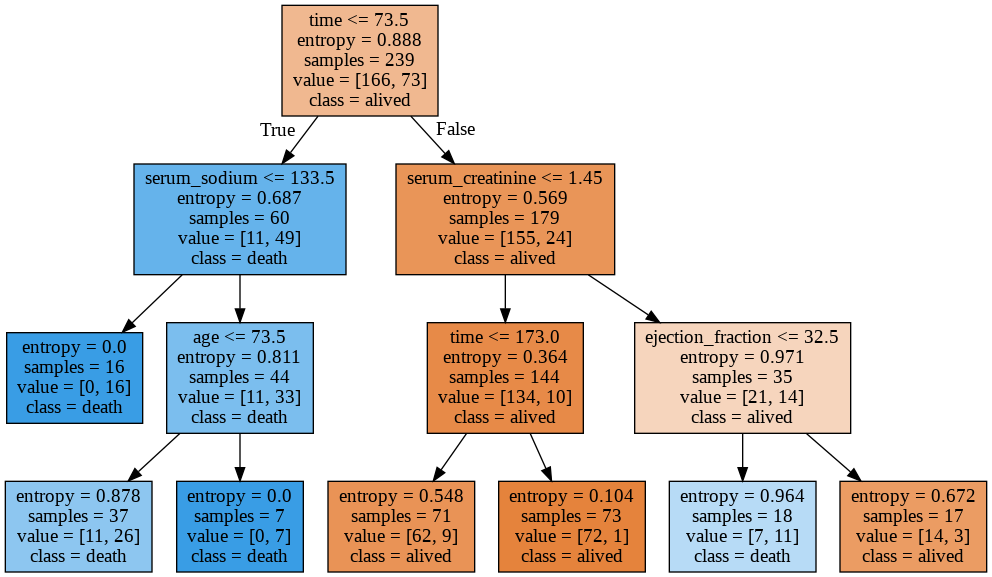

In [ ]:
# 의사결정트리 이미지화
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
command_buf = io.StringIO()
export_graphviz(modelDT, out_file=command_buf, feature_names=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time'], class_names=['alived','death'], filled=True)
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

## Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# GradientBoosting 모델 생성 함수 정의
def build_gb(maxDepth, X_data, Y_data):
  gb = GradientBoostingClassifier(random_state=0, max_depth=maxDepth)
  gb.fit(X_data, Y_data)
  return gb

In [ ]:
# 기존 데이터 이용
gb = build_gb(2,x_train,y_train)
# 상관도 높은 데이터 이용
gb_corr = build_gb(3, x_corr_train, y_corr_train)
# 기존 데이터의 스케일링 이용
gb_standard_scale = build_gb(2, x_train_standard_scale, y_train_standard_scale)
gb_minmax_scale = build_gb(2, x_train_minmax_scale, y_train_minmax_scale)
# 상관도 높은 데이터의 스케일링 이용
gb_corr_standard_scale = build_gb(3, x_corr_train_standard_scale, y_corr_train_standard_scale)
gb_corr_minmax_scale = build_gb(3, x_corr_train_minmax_scale, y_corr_train_minmax_scale)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 모델 평가

# print(classification_report(y_test, gb.predict(x_test)))

# 기존 데이터 이용
print('기존 데이터 학습 정확도 : ', format(gb.score(x_train,y_train)))
print('기존 데이터 정확도 : ', format(gb.score(x_test, y_test)))
print('\n')
# 상관도 높은 데이터 이용
print('상관도 높은 데이터 학습 정확도 : ', format(gb_corr.score(x_corr_train, y_corr_train)))
print('상관도 높은 데이터 정확도 : ', format(gb_corr.score(x_corr_test, y_corr_test)))
print('\n')
# 기존 데이터의 스케일링 이용
print('기존 데이터 스케일링 학습 정확도 (StandardScaler) : ', format(gb_standard_scale.score(x_train_standard_scale, y_train_standard_scale)))
print('기존 데이터 스케일링 정확도 (StandardScaler) : ', format(gb_standard_scale.score(x_test_standard_scale, y_test_standard_scale)))
print('기존 데이터 스케일링 학습 정확도 (MinMaxScaler) : ', format(gb_minmax_scale.score(x_train_minmax_scale, y_train_minmax_scale)))
print('기존 데이터 스케일링 정확도 (MinMaxScaler) : ', format(gb_minmax_scale.score(x_test_minmax_scale, y_test_minmax_scale)))
print('\n')
# 상관도 높은 데이터의 스케일링 이용
print('상관도 높은 데이터 스케일링 학습 정확도 (StandardScaler) : ', format(gb_corr_standard_scale.score(x_corr_train_standard_scale, y_corr_train_standard_scale)))
print('상관도 높은 데이터 스케일링 정확도 (StandardScaler) : ', format(gb_corr_standard_scale.score(x_corr_test_standard_scale, y_corr_test_standard_scale)))
print('상관도 높은 데이터 스케일링 학습 정확도 (MinMaxScaler) : ', format(gb_corr_minmax_scale.score(x_corr_train_minmax_scale, y_corr_train_minmax_scale)))
print('상관도 높은 데이터 스케일링 정확도 (MinMaxScaler) : ', format(gb_corr_minmax_scale.score(x_corr_test_minmax_scale, y_corr_test_minmax_scale)))

기존 데이터 학습 정확도 :  0.9665271966527197
기존 데이터 정확도 :  0.85


상관도 높은 데이터 학습 정확도 :  0.99581589958159
상관도 높은 데이터 정확도 :  0.8666666666666667


기존 데이터 스케일링 학습 정확도 (StandardScaler) :  0.9665271966527197
기존 데이터 스케일링 정확도 (StandardScaler) :  0.85
기존 데이터 스케일링 학습 정확도 (MinMaxScaler) :  0.9665271966527197
기존 데이터 스케일링 정확도 (MinMaxScaler) :  0.85


상관도 높은 데이터 스케일링 학습 정확도 (StandardScaler) :  0.99581589958159
상관도 높은 데이터 스케일링 정확도 (StandardScaler) :  0.8666666666666667
상관도 높은 데이터 스케일링 학습 정확도 (MinMaxScaler) :  0.99581589958159
상관도 높은 데이터 스케일링 정확도 (MinMaxScaler) :  0.8666666666666667


### Gradient Boosting 결과
- 기존 데이터 학습의 경우 max_depth=3 일때 정확도 1.0이 나오면서 overfitting 확인
  - max_depth=2로 낮추고 다시 학습
- Gradient Boosting의 경우 의사결정트리보다는 좋은 정확도를 가지고 있다.
  - 상관도 높은 데이터를 가지고 학습할 경우 99%의 정확도를 가지며 테스트의 경우도 기존 데이터를 가지고 한 것보다 정확도가 높다

## Neural Network


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# keras 모델을 생성하는 함수 정의
# 히든레이어는 relu 함수를 사용하고 출력 레이어는 분류를 위해 sigmoid 사용
# loss함수는 binary_crossentropy, optimzer는 rmsprop, metrics는 accuracy를 사용하여 컴파일
def build_keras(InputDim):
  model = Sequential()
  model.add(Dense(36,input_dim=InputDim,activation='relu'))
  model.add(Dense(18,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [ ]:
# 모델 정확도 함수 정의
def evaluation(model, X_test, Y_test):
  loss, acc = model.evaluate(X_test, Y_test, batch_size=1, verbose=0)
  return acc

In [ ]:
# 모델생성과 학습, 학습결과는 log에 저장
# 기존 데이터 이용
keras = build_keras(12)
keras.fit(x_train, y_train, batch_size=1, epochs=50, verbose=0)
# 상관도 높은 데이터 이용
keras_corr = build_keras(5)
keras_corr.fit(x_corr_train, y_corr_train, batch_size=1, epochs=50, verbose=0)
# 기존 데이터의 스케일링 이용
keras_standard_scale = build_keras(12)
keras_standard_scale.fit(x_train_standard_scale, y_train_standard_scale, batch_size=1, epochs=50, verbose=0)
keras_minmax_scale = build_keras(12)
keras_minmax_scale.fit(x_train_minmax_scale, y_train_minmax_scale, batch_size=1, epochs=50, verbose=0)
# 상관도 높은 데이터의 스케일링 이용
keras_corr_standard_scale = build_keras(5)
keras_corr_standard_scale.fit(x_corr_train_standard_scale, y_corr_train_standard_scale, batch_size=1, epochs=50, verbose=0)
keras_corr_minmax_scale = build_keras(5)
keras_corr_minmax_scale.fit(x_corr_train_minmax_scale, y_corr_train_minmax_scale, batch_size=1, epochs=50, verbose=0)

In [ ]:
# 모델 평가
# 기존 데이터 이용
print('기존 데이터 학습 정확도 : ', evaluation(keras, x_train, y_train))
print('기존 데이터 정확도 : ', evaluation(keras, x_test, y_test))
print('\n')
# 상관도 높은 데이터 이용
print('상관도 높은 데이터 학습 정확도 : ', evaluation(keras_corr, x_corr_train, y_corr_train))
print('상관도 높은 데이터 정확도 : ', evaluation(keras_corr, x_corr_test, y_corr_test))
print('\n')
# 기존 데이터의 스케일링 이용
print('기존 데이터 스케일링 학습 정확도 (StandardScaler) : ', evaluation(keras_standard_scale, x_train_standard_scale, y_train_standard_scale))
print('기존 데이터 스케일링 정확도 (StandardScaler) : ', evaluation(keras_standard_scale, x_test_standard_scale, y_test_standard_scale))
print('기존 데이터 스케일링 학습 정확도 (MinMaxScaler) : ', evaluation(keras_minmax_scale, x_train_minmax_scale, y_train_minmax_scale))
print('기존 데이터 스케일링 정확도 (MinMaxScaler) : ', evaluation(keras_minmax_scale, x_test_minmax_scale, y_test_minmax_scale))
print('\n')
# 상관도 높은 데이터의 스케일링 이용
print('상관도 높은 데이터 스케일링 학습 정확도 (StandardScaler) : ', evaluation(keras_corr_standard_scale, x_corr_train_standard_scale, y_corr_train_standard_scale))
print('상관도 높은 데이터 스케일링 정확도 (StandardScaler) : ', evaluation(keras_corr_standard_scale, x_corr_test_standard_scale, y_corr_test_standard_scale))
print('상관도 높은 데이터 스케일링 학습 정확도 (MinMaxScaler) : ', evaluation(keras_corr_minmax_scale, x_corr_train_minmax_scale, y_corr_train_minmax_scale))
print('상관도 높은 데이터 스케일링 정확도 (MinMaxScaler) : ', evaluation(keras_corr_minmax_scale, x_corr_test_minmax_scale, y_corr_test_minmax_scale))

기존 데이터 학습 정확도 :  0.6945606470108032
기존 데이터 정확도 :  0.6166666746139526


상관도 높은 데이터 학습 정확도 :  0.874476969242096
상관도 높은 데이터 정확도 :  0.8333333134651184


기존 데이터 스케일링 학습 정확도 (StandardScaler) :  0.9414225816726685
기존 데이터 스케일링 정확도 (StandardScaler) :  0.800000011920929
기존 데이터 스케일링 학습 정확도 (MinMaxScaler) :  0.8912134170532227
기존 데이터 스케일링 정확도 (MinMaxScaler) :  0.75


상관도 높은 데이터 스케일링 학습 정확도 (StandardScaler) :  0.8912134170532227
상관도 높은 데이터 스케일링 정확도 (StandardScaler) :  0.8333333134651184
상관도 높은 데이터 스케일링 학습 정확도 (MinMaxScaler) :  0.8702929019927979
상관도 높은 데이터 스케일링 정확도 (MinMaxScaler) :  0.800000011920929


### Keras 모델 평가
- 기존 데이터를 적용하여 학습하면 의사결정트리보다 정확도가 좋지 못하다.
- 기존 데이터보다 사망과 상관도가 높은 데이터들로 학습하는 것이 정확도가 상승한다.
- 기존 데이터를 스케일링하는 것만으로도 정확도가 대폭 상승한다.

## 결과
- 학습모델
  1. DecisionTree
  2. Gradient Boosting Classifier
  3. Neural Network
- 데이터
  1. 기존 데이터
  2. 사망과 상관도가 높은 데이터
  3. 기존 데이터를 스케일링(StandardScale, MinMaxScale)한 데이터
  4. 상광도가 높은 데이터를 스케일링(StandradScale, MinMaxScale)한 데이터
3가지의 학습 모델과 4가지의 데이터를 가지고 학습을 진행하였고 모델 평가는 정확도를 기준으로 하였습니다.



In [ ]:
# make_dataframe 함수 정의
def make_dataframe(dt_train, dt_test, gb_train, gb_test, nn_train, nn_test):
  df = pd.DataFrame(columns=['train','test'], index=['Decision Tree', 'Gradient Boosting', 'Neural Network'])
  df['train'] = [dt_train, gb_train, nn_train]
  df['test'] = [dt_test, gb_test, nn_test]
  return df

# draw_graph 함수 정의
def draw_graph(str, data):
  graph = data.plot(kind='bar', figsize=(10,5))
  graph.legend(fontsize=10)
  plt.title(f'{str} accuracy graph', fontsize=10)
  plt.ylabel('accuracy(%)', fontsize=10)
  plt.xticks(rotation=0, fontsize=10)
  return graph

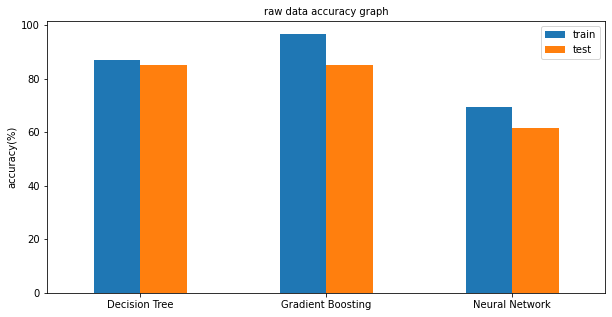

In [ ]:
# 기존 데이터 모델별 정확도
# train
raw_dt_train = modelDT.score(x_train,y_train)*100
raw_gb_train = gb.score(x_train,y_train)*100
raw_nn_train = evaluation(keras, x_train, y_train)*100
# test
raw_dt_test = modelDT.score(x_test,y_test)*100
raw_gb_test = gb.score(x_test,y_test)*100
raw_nn_test = evaluation(keras, x_test, y_test)*100
# make daraframe
raw = make_dataframe(raw_dt_train, raw_dt_test, raw_gb_train, raw_gb_test, raw_nn_train, raw_nn_test)
# draw graph
raw_graph = draw_graph('raw data', raw)

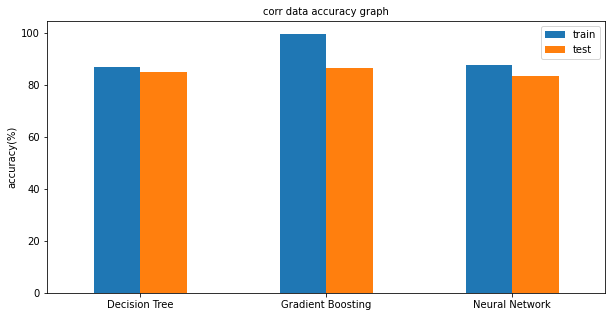

In [ ]:
# 상관도 높은 데이터 모델별 정확도
# train
corr_dt_train = modelDT_corr.score(x_corr_train, y_corr_train)*100
corr_gb_train = gb_corr.score(x_corr_train,y_corr_train)*100
corr_nn_train = evaluation(keras_corr, x_corr_train, y_corr_train)*100
# test
corr_dt_test = modelDT_corr.score(x_corr_test,y_corr_test)*100
corr_gb_test = gb_corr.score(x_corr_test,y_corr_test)*100
corr_nn_test = evaluation(keras_corr, x_corr_test, y_corr_test)*100
# make dataframe
corr = make_dataframe(corr_dt_train, corr_dt_test, corr_gb_train, corr_gb_test, corr_nn_train, corr_nn_test)
# draw graph
corr_graph = draw_graph('corr data',corr)

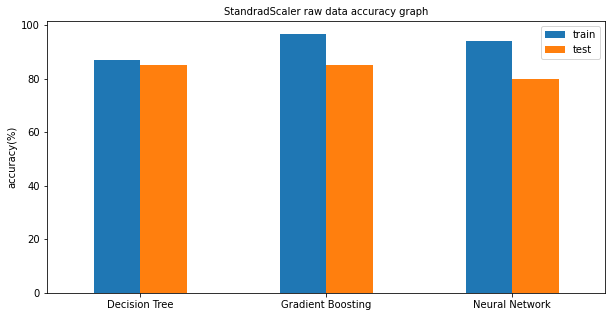

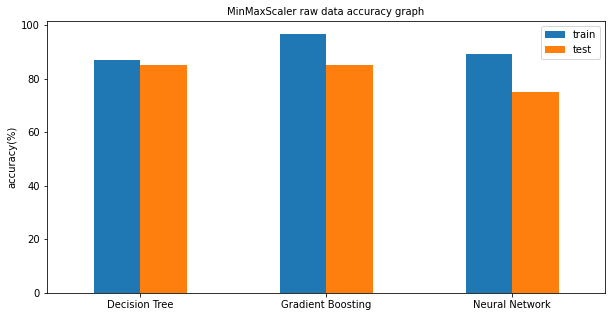

In [ ]:
# 기존 데이터의 스케일링 적용된 데이터 모델별 정확도
# StandardScaler
# train
standard_dt_train = modelDT_standard_scale.score(x_train_standard_scale, y_train_standard_scale)*100
standard_gb_train = gb_standard_scale.score(x_train_standard_scale,y_train_standard_scale)*100
standard_nn_train = evaluation(keras_standard_scale, x_train_standard_scale, y_train_standard_scale)*100
# test
standard_dt_test = modelDT_standard_scale.score(x_test_standard_scale,y_test_standard_scale)*100
standard_gb_test = gb_standard_scale.score(x_test_standard_scale,y_test_standard_scale)*100
standard_nn_test = evaluation(keras_standard_scale, x_test_standard_scale, y_test_standard_scale)*100
# make dataframe
standard_scale = make_dataframe(standard_dt_train, standard_dt_test, standard_gb_train, standard_gb_test, standard_nn_train, standard_nn_test)
# draw graph
standard = draw_graph('StandradScaler raw data', standard_scale)

# MinMaxScaler
# train
minmax_dt_train = modelDT_minmax_scale.score(x_train_minmax_scale, y_train_minmax_scale)*100
minmax_gb_train = gb_minmax_scale.score(x_train_minmax_scale,y_train_minmax_scale)*100
minmax_nn_train = evaluation(keras_minmax_scale, x_train_minmax_scale, y_train_minmax_scale)*100
# test
minmax_dt_test = modelDT_minmax_scale.score(x_test_minmax_scale,y_test_minmax_scale)*100
minmax_gb_test = gb_minmax_scale.score(x_test_minmax_scale,y_test_minmax_scale)*100
minmax_nn_test = evaluation(keras_minmax_scale, x_test_minmax_scale, y_test_minmax_scale)*100
# make dataframe
minmax_scale = make_dataframe(minmax_dt_train, minmax_dt_test, minmax_gb_train, minmax_gb_test, minmax_nn_train, minmax_nn_test)
# draw graph
minmax_graph = draw_graph('MinMaxScaler raw data', minmax_scale)

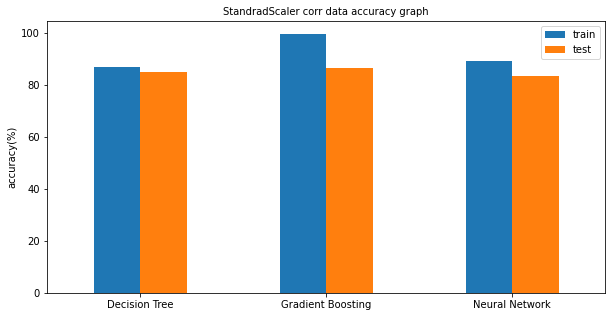

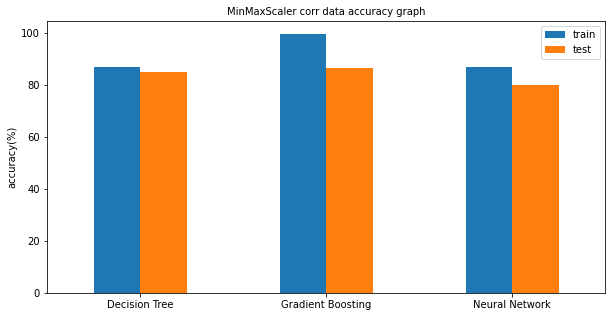

In [ ]:
# 상관도 높은 데이터의 스케일링 적용된 데이터 모델별 정확도
# StandardScaler
# train
corr_standard_dt_train = modelDT_corr_standard_scale.score(x_corr_train_standard_scale, y_corr_train_standard_scale)*100
corr_standard_gb_train = gb_corr_standard_scale.score(x_corr_train_standard_scale,y_corr_train_standard_scale)*100
corr_standard_nn_train = evaluation(keras_corr_standard_scale, x_corr_train_standard_scale, y_corr_train_standard_scale)*100
# test
corr_standard_dt_test = modelDT_corr_standard_scale.score(x_corr_test_standard_scale,y_corr_test_standard_scale)*100
corr_standard_gb_test = gb_corr_standard_scale.score(x_corr_test_standard_scale,y_corr_test_standard_scale)*100
corr_standard_nn_test = evaluation(keras_corr_standard_scale, x_corr_test_standard_scale, y_corr_test_standard_scale)*100
# make dataframe
corr_standard_scale = make_dataframe(corr_standard_dt_train, corr_standard_dt_test, corr_standard_gb_train, corr_standard_gb_test, corr_standard_nn_train, corr_standard_nn_test)
# draw graph
corr_standard = draw_graph('StandradScaler corr data', corr_standard_scale)

# MinMaxScaler
# train
corr_minmax_dt_train = modelDT_corr_minmax_scale.score(x_corr_train_minmax_scale, y_corr_train_minmax_scale)*100
corr_minmax_gb_train = gb_corr_minmax_scale.score(x_corr_train_minmax_scale,y_corr_train_minmax_scale)*100
corr_minmax_nn_train = evaluation(keras_corr_minmax_scale, x_corr_train_minmax_scale, y_corr_train_minmax_scale)*100
# test
corr_minmax_dt_test = modelDT_corr_minmax_scale.score(x_corr_test_minmax_scale,y_corr_test_minmax_scale)*100
corr_minmax_gb_test = gb_corr_minmax_scale.score(x_corr_test_minmax_scale,y_corr_test_minmax_scale)*100
corr_minmax_nn_test = evaluation(keras_corr_minmax_scale, x_corr_test_minmax_scale, y_corr_test_minmax_scale)*100
# make dataframe
corr_minmax_scale = make_dataframe(corr_minmax_dt_train, corr_minmax_dt_test, corr_minmax_gb_train, corr_minmax_gb_test, corr_minmax_nn_train,corr_minmax_nn_test)
# draw graph
corr_minmax_graph = draw_graph('MinMaxScaler corr data', corr_minmax_scale)

- 3개의 모델 중 가장 좋은 정확도를 가지고 있는 모델은 **Gradient Boosting Classifier**이다.
- 4개의 데이터 중 가장 좋은 정확도를 가지고 있는 데이터는 **상관도가 높은 데이터를 StandardScale한 데이터**이다
  - 상관도가 높은 데이터 : 나이, 심장에서 나오는 혈액의 비율, 혈액 내 크레아티닌 수치, 혈액 내 나트륨 수치, 회복기간
  - 모든 모델에서 train과 test데이터의 정확도 80%를 넘겨준다